In [1]:
import numpy as np
from scipy.signal import stft
from scipy.stats import zscore

In [14]:
import matplotlib.pyplot as plt

In [2]:
import scipy.io as sio

In [3]:
data = sio.loadmat('../data/synthetic/ts1.mat')

In [4]:
Vp, Vt, Vr = data['Vp'], data['Vt'], data['Vr']

In [5]:
Vp.shape

(1, 12000000)

In [8]:
d = np.vstack((Vp, Vt))
d = np.vstack((d, Vr))

In [9]:
d.shape

(3, 12000000)

In [10]:
d_z = zscore(d, axis=1)

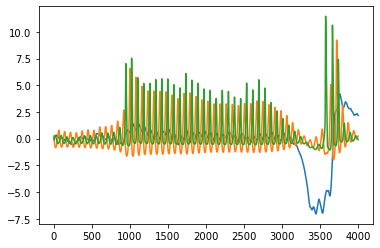

In [35]:
plt.plot(d_z[:,2000:6000].T)

In [43]:
u, s, vh = np.linalg.svd(d_z.T, full_matrices=False)

In [36]:
from sklearn.decomposition import FastICA

In [37]:
ica = FastICA()

In [38]:
sig = ica.fit_transform(d_z.T)

In [39]:
sig.shape

(12000000, 3)

In [40]:
a = ica.mixing_

In [41]:
a

array([[  -72.84262937, -3460.89348246,   130.03943402],
       [ 3428.91164538,  -235.06468016,  -432.79270365],
       [  -21.71787391,  -327.25861814,  3448.54028986]])

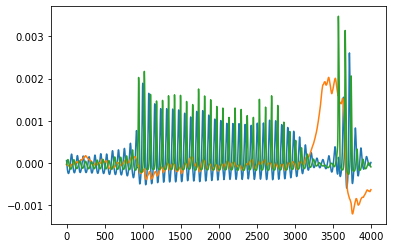

In [47]:
plt.plot(sig[2000:6000,:])

In [28]:
vh

array([[ 0.49386316, -0.44543998,  0.74678136],
       [-0.68272341, -0.73050676,  0.0157677 ],
       [-0.53850527,  0.5176322 ,  0.66488268]])

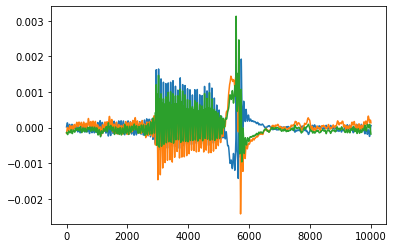

In [20]:
plt.plot(u[:10000,:3])

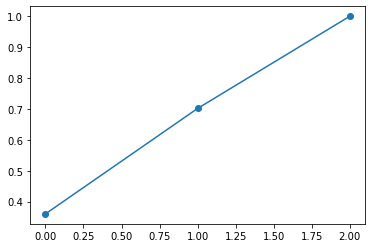

In [45]:
plt.plot(np.cumsum(s)/np.sum(s),'o-')

In [52]:
np.squeeze(np.where((np.cumsum(s)/np.sum(s)) >= 0.95))

array(2)